## Assignment 03 - Obeject Counting on a Conveyor Belt 
Name - **D.M.S.S.Dissanayake**   
Index No - **190155L**

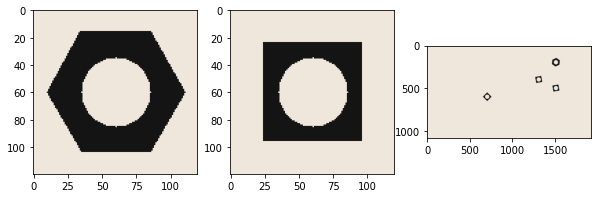

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template -> threshold value =  20.0
squarenut_template -> threshold value =  20.0
conveyer_f100 -> threshold value =  20.0


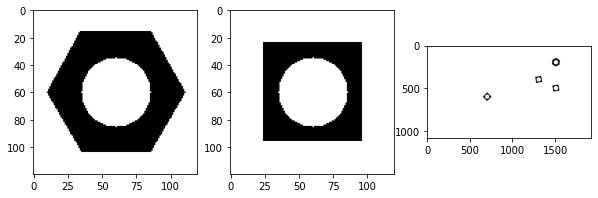

In [3]:
# Convert images to grayscale
hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding
ret1, thresh1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, thresh2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, thresh3= cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("hexnut_template -> threshold value = ",ret1)
print("squarenut_template -> threshold value = ",ret2)
print("conveyer_f100 -> threshold value = ",ret3)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(thresh1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(thresh2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(thresh3, cv.COLOR_RGB2BGR))

plt.show()



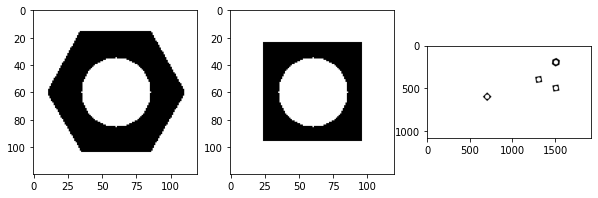

In [4]:
# Apply morphological closing on the images
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing2 = cv.morphologyEx(thresh2, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing3 = cv.morphologyEx(thresh3, cv.MORPH_CLOSE, kernel).astype(np.uint8)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(closing1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing3, cv.COLOR_RGB2BGR))
plt.show()

3
(3, 5)
[[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]]
[[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]


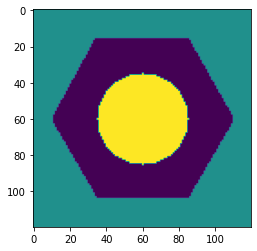

In [5]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing1 , connectivity , cv.CV_32S)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats.shape)
print(stats)
print(centroids)


plt.rcParams["figure.figsize"] = (4,4)
plt.imshow(labels)

3
[[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
[[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


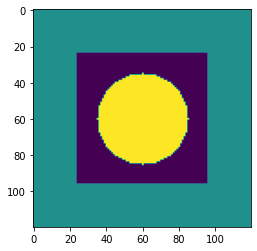

In [6]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing2 , connectivity , cv.CV_32S)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats)
print(centroids)

plt.imshow(labels)

6
(6, 5)
[[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]
[[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


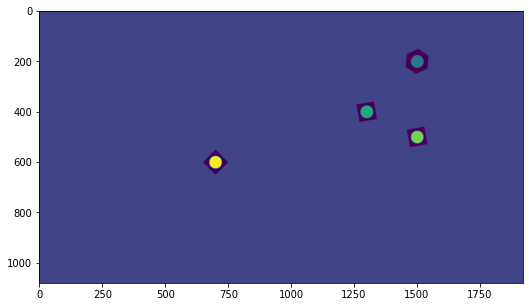

In [7]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing3 , connectivity , cv.CV_32F)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats.shape)
print(stats)
print(centroids)

plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(labels)

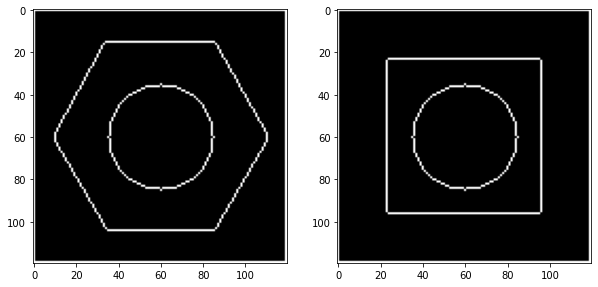

In [8]:
contours1, hierarchy1 = cv.findContours(closing1, 2, 1)
contours2, hierarchy2 = cv.findContours(closing2, 2, 1)

im1 = np.zeros((closing1.shape[0],closing1.shape[1]))
im2 = np.zeros((closing2.shape[0],closing2.shape[1]))

cv.drawContours(im1, contours1, -1, (255,255,255), 1)
cv.drawContours(im2, contours2, -1, (255,255,255), 1)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap = 'gray')

plt.show()

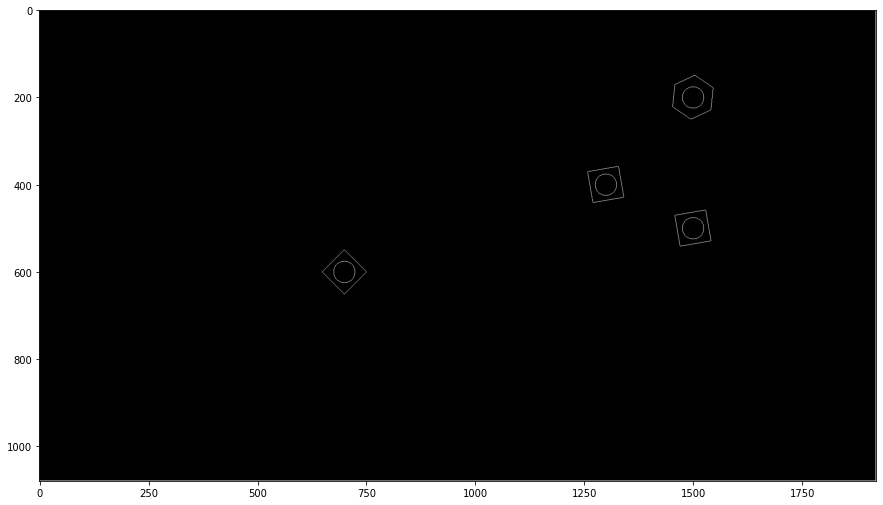

In [9]:
contours3, hierarchy3 = cv.findContours(closing3, 2, 1)
im3 = np.zeros((closing3.shape[0],closing3.shape[1]))
cv.drawContours(im3, contours3, -1, (255,255,255), 1)
plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(im3, cmap = 'gray')
plt.show()


# Detecting Objects on a Synthetic Conveyor

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [11]:
#contours,hierarchy = cv.findContours(closing1,2,1) # finding contours of hexnut_template.png
hexnut_count = 0
for i in range(len(contours3)):
    cnt1 = contours1[2]
    cnt2 = contours3[i]
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    if ret < 0.0001:
        hexnut_count+=1

print("Number of hexnuts = ", hexnut_count)

Number of hexnuts =  1


hexnut_count =  0
squarenut_count =  0
hexnut_count =  0
squarenut_count =  0


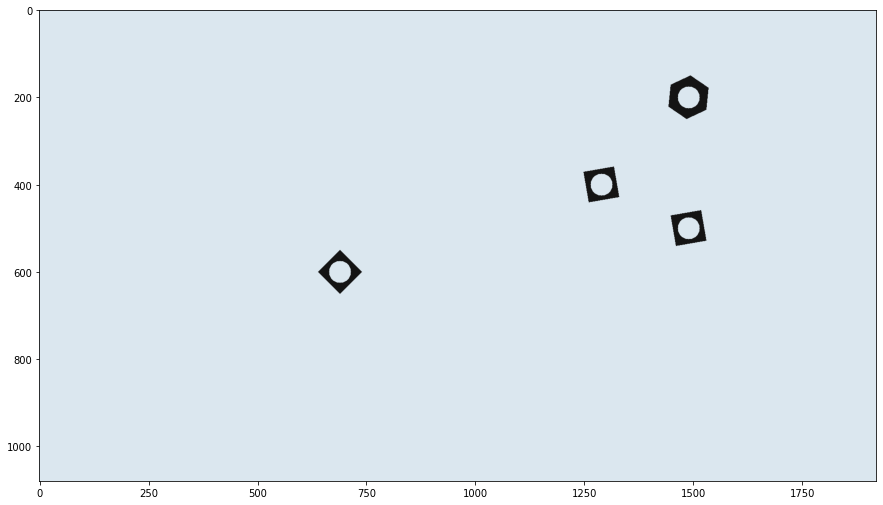

In [25]:
# Experiment
im_names = ['conveyor_f100.png', 'conveyor_f101.png']

for i in range(0,2):

    img =  cv.imread(im_names[i], cv.IMREAD_COLOR)
    im = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, f = cv.threshold(im,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(im, 2, 1)

    hexnut_count = 0
    sqrnut_count = 0

    for i in range(len(contours)):
        cnt1,cnt2,cnt = contours1[2], contours2[2], contours[i]
        ret1 = cv.matchShapes(cnt1,cnt,1,0.0)
        ret2 = cv.matchShapes(cnt2,cnt,1,0.0)
        if ret1 < 0.001:
            hexnut_count+=1    
        if ret2 < 0.001:
            sqrnut_count+=1

    print('hexnut_count = ', hexnut_count)
    print('squarenut_count = ', sqrnut_count)
    plt.imshow(img)
    plt.show



In [55]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = [] 
total_obj = 0
prev_obj_count = 0     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f1 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret1, f1 = cv.threshold(f1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(f1, 2, 1)
    obj_count = 0
    for i in range(len(contours)):
        cnt1,cnt2,cnt = contours1[2], contours2[2], contours[i]
        ret1 = cv.matchShapes(cnt1,cnt,1,0.0)
        ret2 = cv.matchShapes(cnt2,cnt,1,0.0)

        if ret1 < 0.001:
            obj_count+=1

        if ret2 < 0.001:
            obj_count+=1


    if prev_obj_count  <= obj_count:
        total_obj += obj_count-prev_obj_count
    if prev_obj_count  > obj_count:
        total_obj += obj_count-prev_obj_count

        
    prev_obj_count = obj_count
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,10,0), 1, cv.LINE_AA)
    text1 = 'No of objects in the frame:' + str(obj_count)
    cv.putText(frame,text1 , (100, 140), cv.FONT_HERSHEY_COMPLEX, 1, (0,10,0), 1, cv.LINE_AA)
    text2 = 'Total No of objects:' + str(total_obj)
    cv.putText(frame,text2 , (100, 180), cv.FONT_HERSHEY_COMPLEX, 1, (0,10,0), 1, cv.LINE_AA)
    text3 = 'prev:' + str(prev_obj_count)
    cv.putText(frame,text3 , (100, 200), cv.FONT_HERSHEY_COMPLEX, 1, (0,10,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()